In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
#Constantes
q = 1.60217646e-19
k = 1.38064852e-23
T = 33 + 273.15

In [3]:
#datos de RTC PV cell
VL = np.array([-0.2057,-0.1291,-0.0588,0.0057,0.0646,0.1185,0.1678,0.2132,0.2545,0.2924,0.3269,\
                0.3585,0.3873,0.4137,0.4373,0.4590,0.4784,0.4960,0.5119,0.5265,0.5398,0.5521,\
                0.5633,0.5736,0.5833,0.5900])
IL = np.array([0.7640,0.7620,0.7605,0.7605,0.7600,0.7590,0.7570,0.7570,0.7555,0.7540,0.7505,\
                0.7465,0.7385,0.7280,0.7065,0.6755,0.6320,0.5730,0.4990,0.4130,0.3165,0.2120,\
                0.1035,-0.0100,-0.1230,-0.2100])
#Params
#Iph Rs Rsh ISD n

$$ f_{SD}(V_L,I_L,\theta) = \theta_1 - \theta_4 \times \left[ \exp \left( \frac{q(V_L+I_L\theta_2)}{\theta_5 k T} \right) -1 \right] - \frac{V_L+I_L\theta_2}{\theta_3} - I_L
$$

In [4]:
def fsd(params):
  temp = VL+IL*params[1]
  return params[0] - params[3]*1e-6*(np.exp((q*temp)/(params[4]*k*T))-1.)-temp/params[2]-IL

def objfun(params):
  return np.sqrt(np.mean(fsd(params)**2))

In [5]:
#Limites para los parametros de una celda con el modelo SDM para France RTC
#Iph Rs Rsh ISD n
lb = np.array([0.,0.,0.,0.,1.])
ub = np.array([1.,0.5,100.,1.,2.])
bounds = [(0.,1.),(0.,0.5),(0,100.),(0.,1.),(1.,2.)]

In [6]:
#Iph Rs Rsh ISD n
x = np.array([0.76077552,0.03637,53.71852,0.32302,1.48110817])
#Para estos parametros el resultado debe ser 9.8602e-4
objfun(x)

np.float64(0.001023842872750516)

In [7]:
#Iph Rs Rsh ISD n
x = np.array([0.7620,0.0345,43.1034,0.4798,1.5172])
#Para estos parametros el resultado debe ser 0.019
objfun(x)

np.float64(0.019004791080137393)

In [8]:
#Minimizamos la funcion objetivo a partir de un punto x0
np.random.seed(0)
x0 = (ub-lb)*np.random.rand(5)+lb
res = minimize(objfun,x0,method='L-BFGS-B',bounds=bounds, tol=1e-12)
res

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.001016516911230871
        x: [ 7.605e-01  3.613e-02  6.027e+01  3.494e-01  1.489e+00]
      nit: 86
      jac: [-5.963e-04 -3.991e-04  8.175e-06 -2.438e-04  8.697e-04]
     nfev: 930
     njev: 155
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

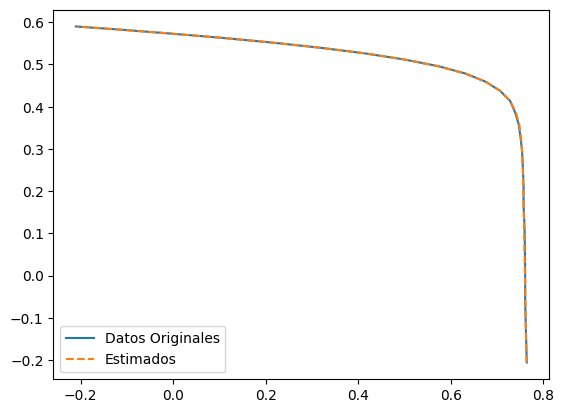

In [9]:
#Diferencia grafica
plt.plot(IL,VL)
#Al sumarle IL a fsd obtienes la corriente del panel estimada a partir de los parametros optimizados
plt.plot(IL+fsd(res.x),VL,'--')
plt.legend(['Datos Originales','Estimados'])